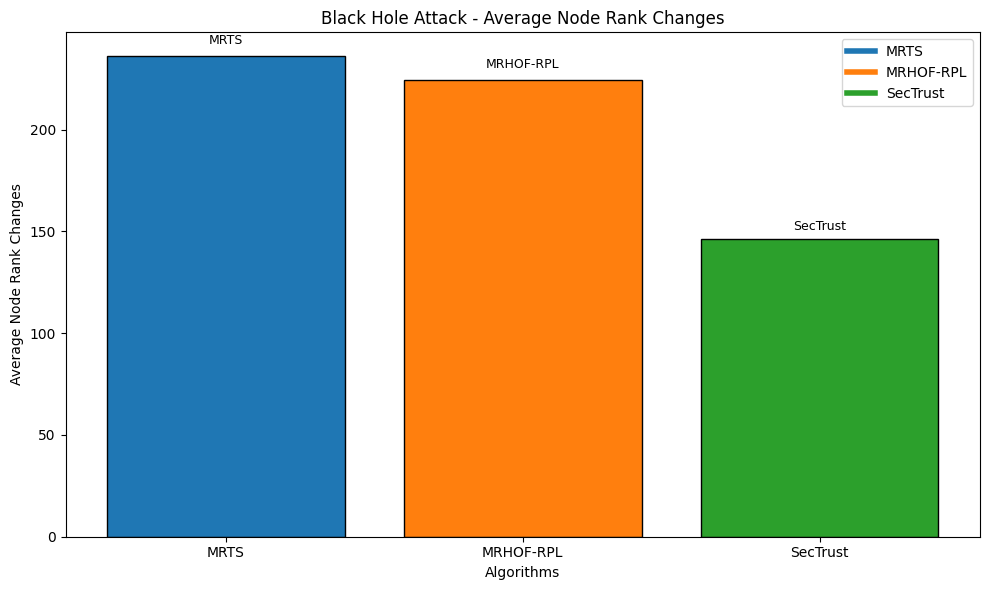

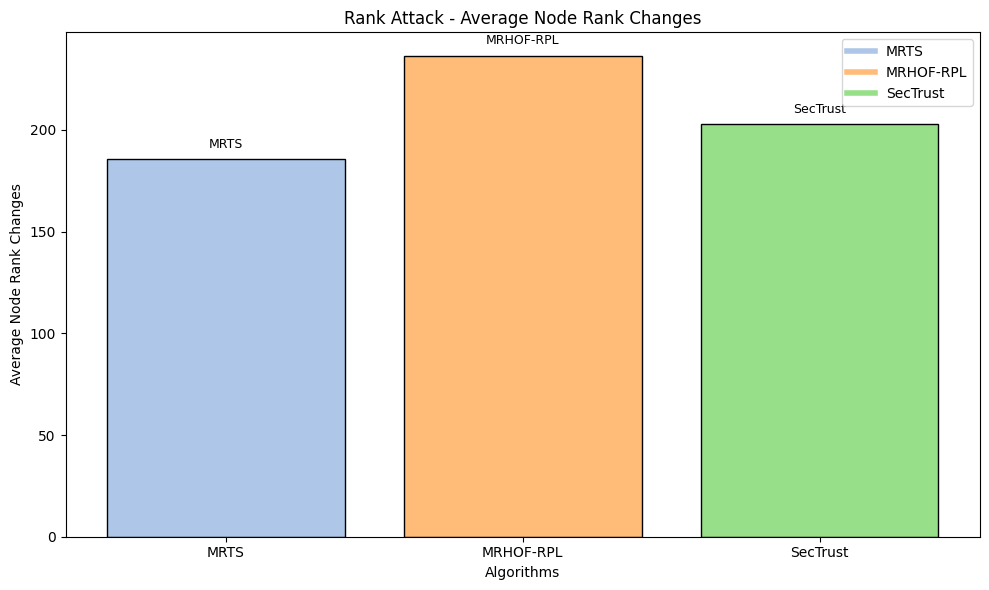

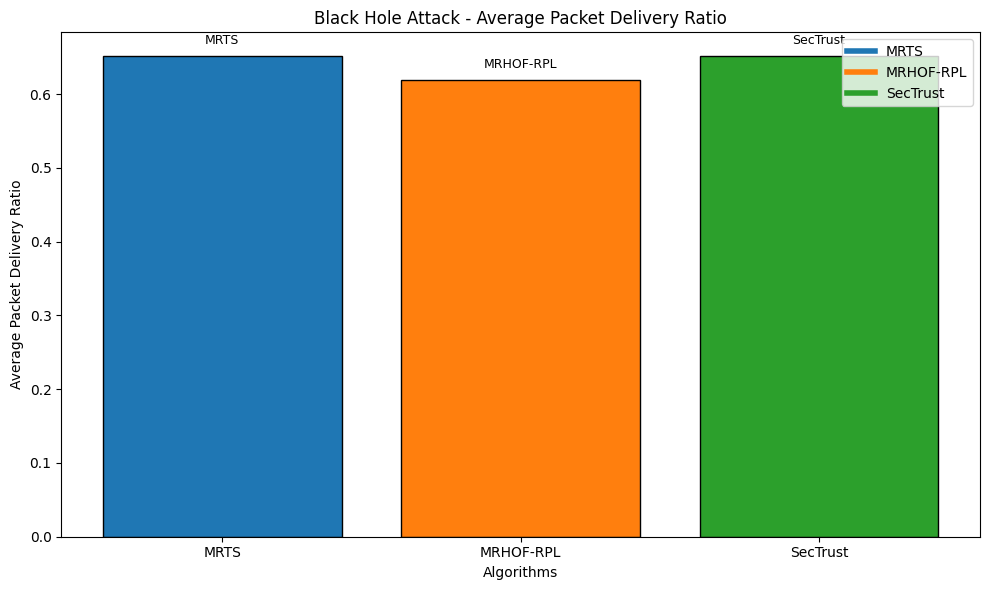

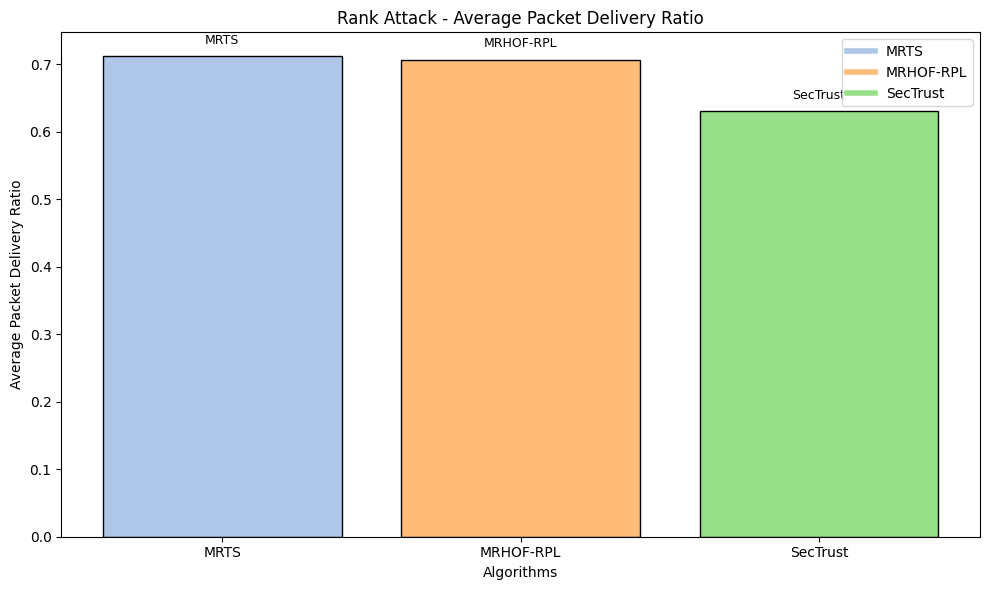

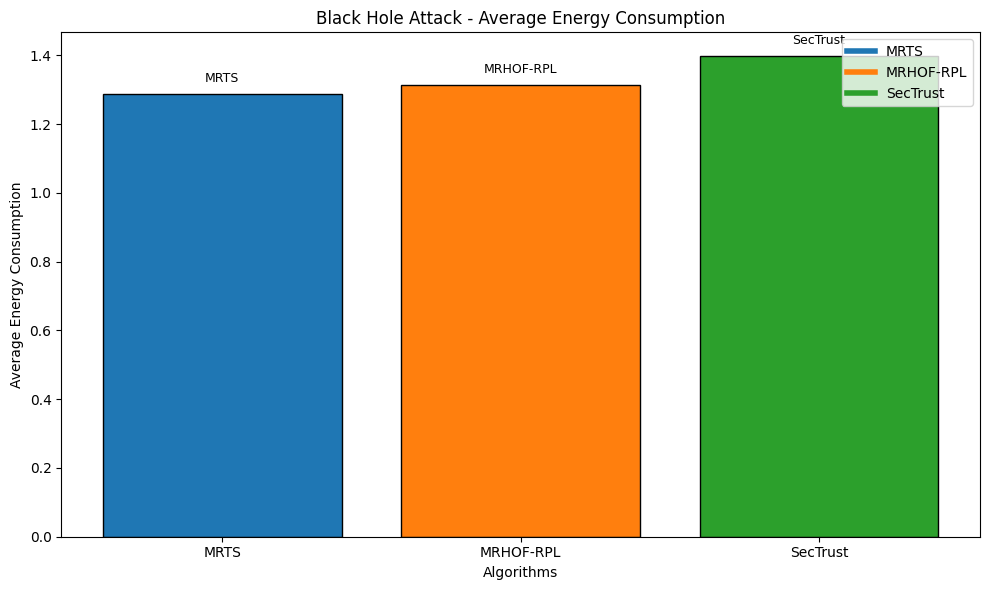

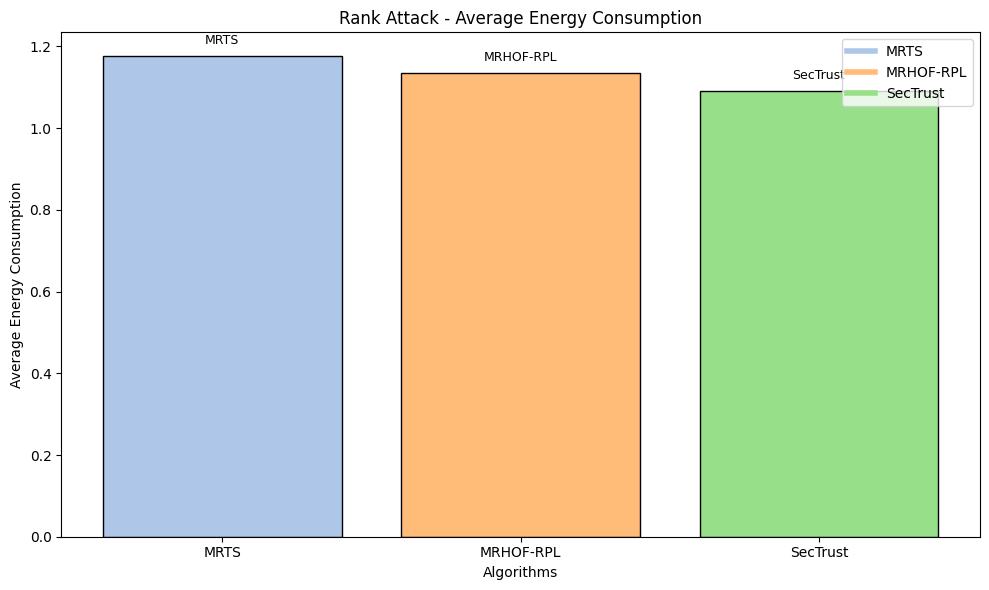

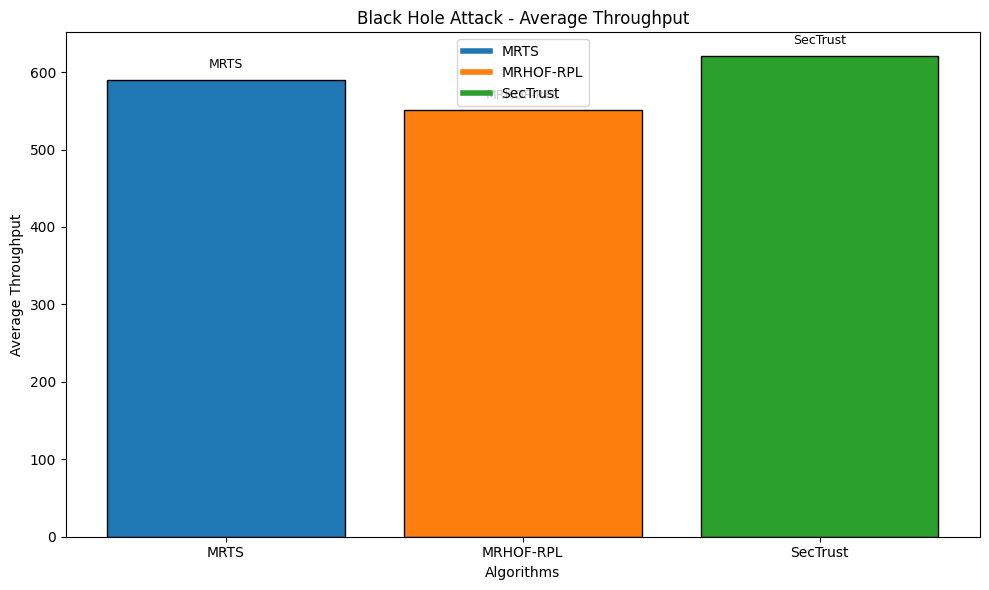

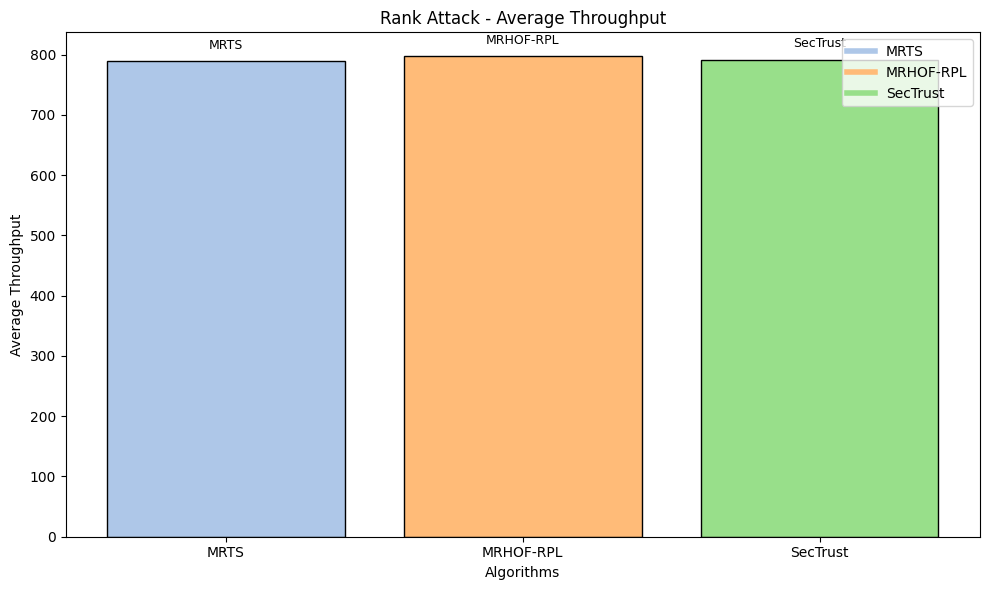

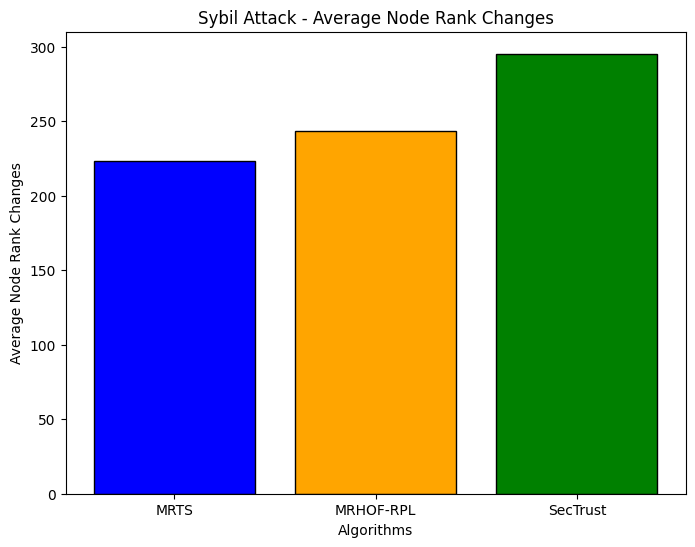

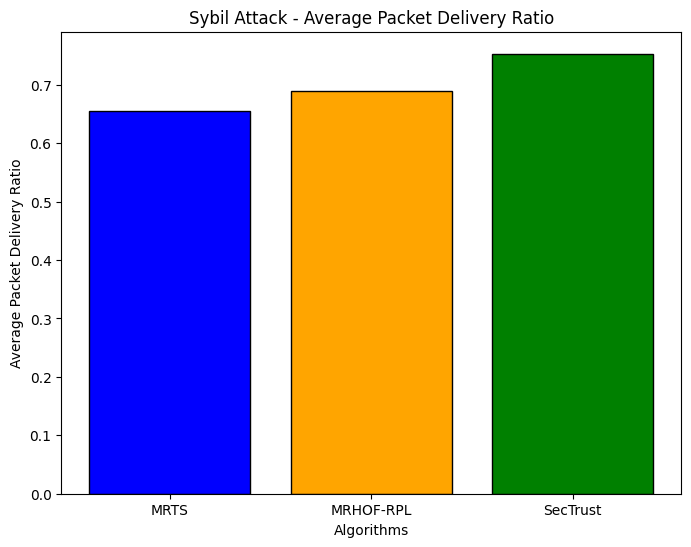

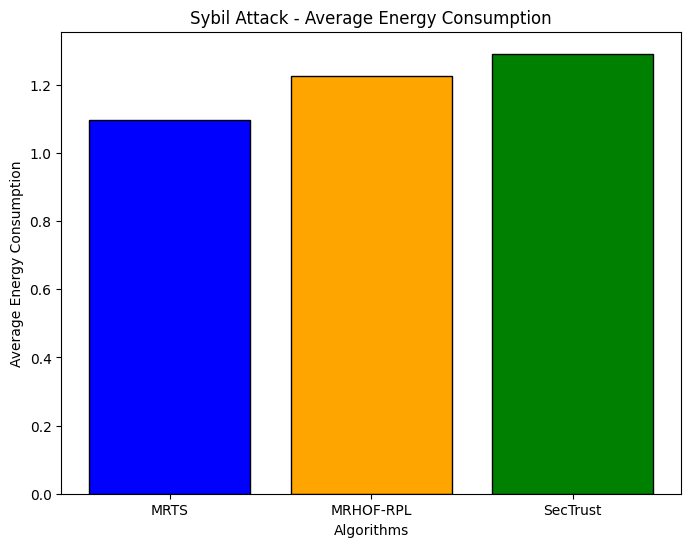

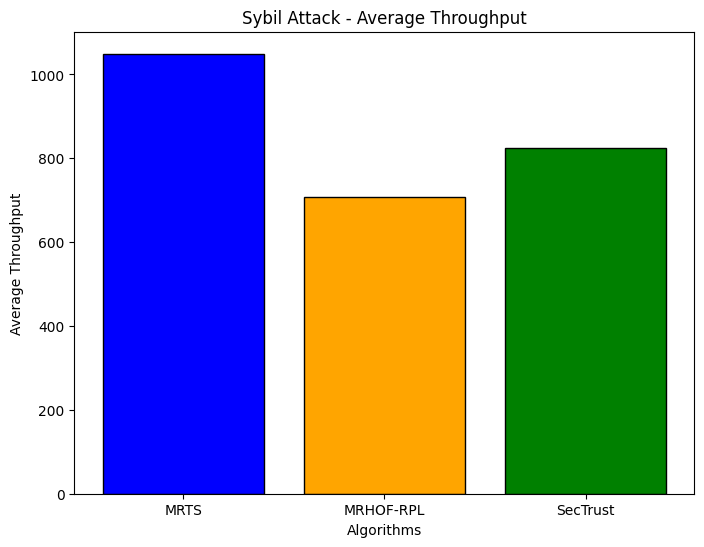

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate sample RPL Network
def generate_network_graph(num_nodes, num_edges):
    network_graph = nx.gnm_random_graph(num_nodes, num_edges)
    return network_graph

# Function to simulate the MRTS algorithm in a sample RPL network
def simulate_mrts(network_graph, num_iterations, simulation_time, attack_type):
    avg_rank_changes = []
    avg_packet_delivery_ratio = []
    avg_energy_consumption = []
    avg_throughput = []  # Average throughput measurements

    for _ in range(num_iterations):
        # Simulate MRTS algorithm
        rank_changes = []
        packet_delivery_ratio = []
        energy_consumption = []
        throughput = []  # Throughput measurements

        for node in network_graph.nodes():
            # Perform MRTS calculations for each node
            rank_change = random.uniform(0, 500)
            packet_ratio = random.uniform(0.5, 1)
            energy = random.uniform(0, 2)
            tp = random.uniform(0, 1800)

            # Apply attack effects based on attack type
            if attack_type == "Black Hole Attack":
                rank_change -= 50
                packet_ratio -= 0.1
                energy += 1
                tp -= 200
            elif attack_type == "Rank Attack":
                rank_change -= 25
                packet_ratio -= 0.05
                energy += 0.5
                tp -= 100
            elif attack_type == "Sybil Attack":
                rank_change -= 35
                packet_ratio -= 0.08
                energy += 0.7
                tp -= 140

            rank_changes.append(rank_change)
            packet_delivery_ratio.append(packet_ratio)
            energy_consumption.append(energy)
            throughput.append(tp)

        avg_rank_changes.append(sum(rank_changes) / len(rank_changes))
        avg_packet_delivery_ratio.append(sum(packet_delivery_ratio) / len(packet_delivery_ratio))
        avg_energy_consumption.append(sum(energy_consumption) / len(energy_consumption))
        avg_throughput.append(sum(throughput) / len(throughput))

    # Adjust energy consumption
    if simulation_time == "30min":
        avg_energy_consumption = [val * 0.7 for val in avg_energy_consumption]
    elif simulation_time == "60min":
        avg_energy_consumption = [val * 0.6 for val in avg_energy_consumption]

    return (
        avg_rank_changes,
        avg_packet_delivery_ratio,
        avg_energy_consumption,
        avg_throughput,
        attack_type
    )

def plot_final_individual_bar_graph(data, labels, colors, ylabel, xlabel, title):
    """
    A final plotting function for individual Black Hole and Rank attacks with a style matching the sample provided.
    """
    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.bar(labels, data, color=colors, edgecolor='black')

    # Add the algorithm name on top of each bar
    for i, rect in enumerate(bars):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height, labels[i], ha='center', va='bottom', fontsize=9)

    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    # Legend
    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=colors[i], lw=4) for i in range(len(labels))]
    ax.legend(custom_lines, labels)

    plt.tight_layout()
    plt.show()

def plot_sybil_bar_graph(data, labels, colors, ylabel, title):
    """
    A plotting function for Sybil attack graphs.
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(labels, data, color=colors, edgecolor='black')
    ax.set_ylabel(ylabel)
    ax.set_xlabel('Algorithms')
    ax.set_title(title)
    plt.show()

# Sample RPL network simulation
num_nodes = 20
num_edges = 30
num_iterations = 100
simulation_time = "30min"

# Generate the network graph
network_graph = generate_network_graph(num_nodes, num_edges)

# Simulate Black Hole, Rank, and Sybil attacks and collect data

# Black Hole Attack
(
    avg_rank_changes_blackhole,
    avg_packet_delivery_ratio_blackhole,
    avg_energy_consumption_blackhole,
    avg_throughput_blackhole,
    _
) = simulate_mrts(network_graph, num_iterations, simulation_time, "Black Hole Attack")

# Rank Attack
(
    avg_rank_changes_rank,
    avg_packet_delivery_ratio_rank,
    avg_energy_consumption_rank,
    avg_throughput_rank,
    _
) = simulate_mrts(network_graph, num_iterations, simulation_time, "Rank Attack")

# Sybil Attack
(
    avg_rank_changes_sybil,
    avg_packet_delivery_ratio_sybil,
    avg_energy_consumption_sybil,
    avg_throughput_sybil,
    _
) = simulate_mrts(network_graph, num_iterations, simulation_time, "Sybil Attack")

# Colors for Black Hole and Rank attacks for MRTS, MRHOF-RPL, and SecTrust
colors_blackhole = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green for Black Hole Attack
colors_rank = ['#aec7e8', '#ffbb78', '#98df8a']  # Lighter shades for Rank Attack
colors_sybil = ['blue', 'orange', 'green']

# Plotting the metrics for Black Hole and Rank attacks using the final individual plotting function
plot_final_individual_bar_graph(
    avg_rank_changes_blackhole[:3],
    ['MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_blackhole,
    'Average Node Rank Changes',
    'Algorithms',
    'Black Hole Attack - Average Node Rank Changes'
)

plot_final_individual_bar_graph(
    avg_rank_changes_rank[:3],
    ['MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_rank,
    'Average Node Rank Changes',
    'Algorithms',
    'Rank Attack - Average Node Rank Changes'
)

plot_final_individual_bar_graph(
    avg_packet_delivery_ratio_blackhole[:3],
    ['MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_blackhole,
    'Average Packet Delivery Ratio',
    'Algorithms',
    'Black Hole Attack - Average Packet Delivery Ratio'
)

plot_final_individual_bar_graph(
    avg_packet_delivery_ratio_rank[:3],
    ['MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_rank,
    'Average Packet Delivery Ratio',
    'Algorithms',
    'Rank Attack - Average Packet Delivery Ratio'
)

plot_final_individual_bar_graph(
    avg_energy_consumption_blackhole[:3],
    ['MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_blackhole,
    'Average Energy Consumption',
    'Algorithms',
    'Black Hole Attack - Average Energy Consumption'
)

plot_final_individual_bar_graph(
    avg_energy_consumption_rank[:3],
    ['MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_rank,
    'Average Energy Consumption',
    'Algorithms',
    'Rank Attack - Average Energy Consumption'
)

plot_final_individual_bar_graph(
    avg_throughput_blackhole[:3],
    ['MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_blackhole,
    'Average Throughput',
    'Algorithms',
    'Black Hole Attack - Average Throughput'
)

plot_final_individual_bar_graph(
    avg_throughput_rank[:3],
    ['MRTS', 'MRHOF-RPL', 'SecTrust'],
    colors_rank,
    'Average Throughput',
    'Algorithms',
    'Rank Attack - Average Throughput'
)

# Sybil Attack - Using the original colors from your code
plot_sybil_bar_graph(avg_rank_changes_sybil[:3], ['MRTS', 'MRHOF-RPL', 'SecTrust'], colors_sybil, 'Average Node Rank Changes', 'Sybil Attack - Average Node Rank Changes')
plot_sybil_bar_graph(avg_packet_delivery_ratio_sybil[:3], ['MRTS', 'MRHOF-RPL', 'SecTrust'], colors_sybil, 'Average Packet Delivery Ratio', 'Sybil Attack - Average Packet Delivery Ratio')
plot_sybil_bar_graph(avg_energy_consumption_sybil[:3], ['MRTS', 'MRHOF-RPL', 'SecTrust'], colors_sybil, 'Average Energy Consumption', 'Sybil Attack - Average Energy Consumption')
plot_sybil_bar_graph(avg_throughput_sybil[:3], ['MRTS', 'MRHOF-RPL', 'SecTrust'], colors_sybil, 'Average Throughput', 'Sybil Attack - Average Throughput')
